# CREATION OF THE ANALYTIC DATAMART

## SET UP

In [238]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%config IPCompleter.greedy=True

## DATA IMPORT

In [239]:
data_file_name_1 = 'Rental and sale prices in Coruña.pickle'
data_file_name_2 = 'Properties for sale in Coruña.pickle'

Data loading.

In [240]:
path_1= '../../02_Data/02_Work/' + data_file_name_1
path_2 = '../../02_Data/02_Work/' + data_file_name_2

In [241]:
df_rental_sale = pd.read_pickle(path_1)
df_rental_sale

,precio_venta_m2,precio_alquiler_m2
distrito,,
Centro - Juan Flórez - Plaza Pontevedra,3.590 €/m²,1.254 €
Los Castros - Castrillón - Eiris,2.246 €/m²,11 €/m²
Monte Alto - Zalaeta - Atocha,3.422 €/m²,12 €/m²
Agra del Orzán - Ventorrillo - Vioño,2.218 €/m²,10 €/m²
Someso - Matogrande,2.457 €/m²,11 €/m²
Cuatro Caminos - Plaza de la Cubela,2.535 €/m²,13 €/m²
Riazor - Los Rosales,3.242 €/m²,10 €/m²
Os Mallos,2.304 €/m²,12 €/m²
Ciudad Vieja,4.521 €/m²,14 €/m²


In [242]:
df_properties = pd.read_pickle(path_2)
df_properties

,itemlink,Precio,itemparking,itemdetail,itemdetail2
itemlink_URL,,,,,
https://www.idealista.com/inmueble/106370978/,"\nPiso en avenida Hércules, Monte Alto - Zalae...",285.000€,NaN,2 hab.,100 m²
https://www.idealista.com/inmueble/97221042/,"\nDúplex en calle José Pascual López-Cortón, S...",480.000€,Garaje incluido,4 hab.,200 m²
https://www.idealista.com/inmueble/105277913/,"\nPiso en calle Ramón de la Sagra, Ensanche, a...",460.000€,Garaje opc. 30.000 €,3 hab.,124 m²
https://www.idealista.com/inmueble/105967967/,"\nPiso en calle Menéndez y Pelayo, Ensanche, a...",550.000€,Garaje incluido,5 hab.,160 m²
https://www.idealista.com/inmueble/105859017/,"\nPiso en calle Ría do Burgo, Someso - Matogra...",170.000€,NaN,3 hab.,85 m²
...,...,...,...,...,...
https://www.idealista.com/inmueble/101388147/,"\nPiso en avenida Navarra, 5, Monte Alto - Zal...",160.000€,NaN,4 hab.,80 m²
https://www.idealista.com/inmueble/36223126/,"\nPiso en avenida de Pedralonga, 57, Eirís, a ...",179.000€,Garaje incluido,2 hab.,70 m²
https://www.idealista.com/inmueble/95139267/,"\nPiso en calle Médico Devesa Nuñez, 19, Somes...",135.000€,NaN,3 hab.,64 m²


## DATA QUALITY

#### General view

In [243]:
df_rental_sale.head()

,precio_venta_m2,precio_alquiler_m2
distrito,,
Centro - Juan Flórez - Plaza Pontevedra,3.590 €/m²,1.254 €
Los Castros - Castrillón - Eiris,2.246 €/m²,11 €/m²
Monte Alto - Zalaeta - Atocha,3.422 €/m²,12 €/m²
Agra del Orzán - Ventorrillo - Vioño,2.218 €/m²,10 €/m²
Someso - Matogrande,2.457 €/m²,11 €/m²


In [244]:
df_rental_sale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Centro - Juan Flórez - Plaza Pontevedra to Mesoiro
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   precio_venta_m2     13 non-null     object
 1   precio_alquiler_m2  13 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


#### Name cleaning

In [245]:
from janitor import clean_names

In [246]:
clean_names(df_rental_sale)
clean_names(df_properties)

,itemlink,precio,itemparking,itemdetail,itemdetail2
itemlink_URL,,,,,
https://www.idealista.com/inmueble/106370978/,"\nPiso en avenida Hércules, Monte Alto - Zalae...",285.000€,NaN,2 hab.,100 m²
https://www.idealista.com/inmueble/97221042/,"\nDúplex en calle José Pascual López-Cortón, S...",480.000€,Garaje incluido,4 hab.,200 m²
https://www.idealista.com/inmueble/105277913/,"\nPiso en calle Ramón de la Sagra, Ensanche, a...",460.000€,Garaje opc. 30.000 €,3 hab.,124 m²
https://www.idealista.com/inmueble/105967967/,"\nPiso en calle Menéndez y Pelayo, Ensanche, a...",550.000€,Garaje incluido,5 hab.,160 m²
https://www.idealista.com/inmueble/105859017/,"\nPiso en calle Ría do Burgo, Someso - Matogra...",170.000€,NaN,3 hab.,85 m²
...,...,...,...,...,...
https://www.idealista.com/inmueble/101388147/,"\nPiso en avenida Navarra, 5, Monte Alto - Zal...",160.000€,NaN,4 hab.,80 m²
https://www.idealista.com/inmueble/36223126/,"\nPiso en avenida de Pedralonga, 57, Eirís, a ...",179.000€,Garaje incluido,2 hab.,70 m²
https://www.idealista.com/inmueble/95139267/,"\nPiso en calle Médico Devesa Nuñez, 19, Somes...",135.000€,NaN,3 hab.,64 m²


We clean up whitespace at the end of the district names in the rental_sale dataframe.

In [247]:
df_rental_sale.reset_index(inplace=True)

In [248]:
df_rental_sale.distrito= df_rental_sale.distrito.apply(lambda x: x.rstrip())
df_rental_sale.distrito

0     Centro - Juan Flórez - Plaza Pontevedra
1            Los Castros - Castrillón - Eiris
2               Monte Alto - Zalaeta - Atocha
3        Agra del Orzán - Ventorrillo - Vioño
4                         Someso - Matogrande
5         Cuatro Caminos - Plaza de la Cubela
6                        Riazor - Los Rosales
7                                   Os Mallos
8                                Ciudad Vieja
9                             Sagrada Familia
10                       Elviña - A Zapateira
11                                      Vioño
12                                    Mesoiro
Name: distrito, dtype: object

In [249]:
df_rental_sale.set_index('distrito',inplace=True)

#### Variables and types

**We review the variable types.**

In [250]:
df_rental_sale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Centro - Juan Flórez - Plaza Pontevedra to Mesoiro
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   precio_venta_m2     13 non-null     object
 1   precio_alquiler_m2  13 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


In [251]:
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127 entries, https://www.idealista.com/inmueble/106370978/ to https://www.idealista.com/inmueble/103576765/
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   itemlink     1127 non-null   object
 1   Precio       1127 non-null   object
 2   itemparking  458 non-null    object
 3   itemdetail   1127 non-null   object
 4   itemdetail2  1124 non-null   object
dtypes: object(5)
memory usage: 52.8+ KB


**We rename the variables we consider necessary and correct the data of the variables prior to type reassignment.**

**We start with df_properties.**

In [252]:
df_properties.reset_index(inplace=True)

In [253]:
df_properties.columns=['url','address','sale_price','parking','rooms','m2']

In [254]:
df_properties.address= df_properties.address.str.replace('\n','')

In [255]:
df_properties['district']= df_properties.address.apply(lambda x: x.split(',')[-2].strip())

In [256]:
df_properties

,url,address,sale_price,parking,rooms,m2,district
0,https://www.idealista.com/inmueble/106370978/,"Piso en avenida Hércules, Monte Alto - Zalaeta...",285.000€,NaN,2 hab.,100 m²,Monte Alto - Zalaeta - Atocha
1,https://www.idealista.com/inmueble/97221042/,"Dúplex en calle José Pascual López-Cortón, Som...",480.000€,Garaje incluido,4 hab.,200 m²,Someso - Matogrande
2,https://www.idealista.com/inmueble/105277913/,"Piso en calle Ramón de la Sagra, Ensanche, a C...",460.000€,Garaje opc. 30.000 €,3 hab.,124 m²,Ensanche
3,https://www.idealista.com/inmueble/105967967/,"Piso en calle Menéndez y Pelayo, Ensanche, a C...",550.000€,Garaje incluido,5 hab.,160 m²,Ensanche
4,https://www.idealista.com/inmueble/105859017/,"Piso en calle Ría do Burgo, Someso - Matogrand...",170.000€,NaN,3 hab.,85 m²,Someso - Matogrande
...,...,...,...,...,...,...,...
1122,https://www.idealista.com/inmueble/101388147/,"Piso en avenida Navarra, 5, Monte Alto - Zalae...",160.000€,NaN,4 hab.,80 m²,Monte Alto - Zalaeta - Atocha
1123,https://www.idealista.com/inmueble/36223126/,"Piso en avenida de Pedralonga, 57, Eirís, a Co...",179.000€,Garaje incluido,2 hab.,70 m²,Eirís
1124,https://www.idealista.com/inmueble/95139267/,"Piso en calle Médico Devesa Nuñez, 19, Someso ...",135.000€,NaN,3 hab.,64 m²,Someso - Matogrande
1125,https://www.idealista.com/inmueble/104145671/,"Chalet adosado en calle Ultramar, 8, Riazor - ...",210.000€,NaN,2 hab.,60 m²,Riazor - Los Rosales


We remove all properties that are houses or chalets.

In [257]:
text_list=('Cas','Chalet')

In [258]:
to_remove_list=df_properties.loc[df_properties.address.str.startswith(text_list)].index.to_list()

In [259]:
df_properties.drop(index=to_remove_list,inplace=True)

We correct the values of the address and district variables that have incorrect text.

In [260]:
to_remove=['Piso en ','Dúplex en ','Casa o chalet independiente en ','Ático en ','Estudio en ','Chalet adosado en ','Chalet en ']

for i in to_remove:
   df_properties.district= df_properties.district.str.replace(i,'') 

for i in to_remove:
   df_properties.district= df_properties.district.str.replace(i,'') 

We change the garage variable to a binary Yes/No. We consider optional garage as No.

In [261]:
def replace_garage(variable):
    if variable=='Garaje incluido':
        return'SI'
    else:
        return 'NO'

df_properties.parking= df_properties.parking.apply(lambda x: replace_garage(x))

We remove the currency from the price text.

In [262]:
df_properties.sale_price= df_properties.sale_price.str.replace('€','')

In [263]:
df_properties.sale_price= df_properties.sale_price.str.replace('.','')

There are some records that have the rooms variable incorrectly assigned. They actually do not have a value, and the square meters were assigned to it during scraping.

We move the data to its corresponding column and mark the record for n_rooms as null by assigning it 0. This way, we can later convert the variable to int and correct the nulls in the appropriate section.

In [264]:
df_properties.loc[~df_properties.rooms.apply(lambda x: x.__contains__('hab')),'m2']=df_properties.loc[~df_properties.rooms.apply(lambda x: x.__contains__('hab')),'rooms']

In [265]:
df_properties.loc[~df_properties.rooms.apply(lambda x: x.__contains__('hab')),'rooms']='0'

We correct the text in the values of the m2 column.

In [266]:
df_properties.m2= df_properties.m2.str.replace('m²','')

In [267]:
df_properties.m2= df_properties.m2.str.replace('.','')

We correct the text in the values of the room column.

In [268]:
df_properties.rooms= df_properties.rooms.str.replace(' hab.','')

In [269]:
df_properties

,url,address,sale_price,parking,rooms,m2,district
0,https://www.idealista.com/inmueble/106370978/,"Piso en avenida Hércules, Monte Alto - Zalaeta...",285000,NO,2,100,Monte Alto - Zalaeta - Atocha
1,https://www.idealista.com/inmueble/97221042/,"Dúplex en calle José Pascual López-Cortón, Som...",480000,SI,4,200,Someso - Matogrande
2,https://www.idealista.com/inmueble/105277913/,"Piso en calle Ramón de la Sagra, Ensanche, a C...",460000,NO,3,124,Ensanche
3,https://www.idealista.com/inmueble/105967967/,"Piso en calle Menéndez y Pelayo, Ensanche, a C...",550000,SI,5,160,Ensanche
4,https://www.idealista.com/inmueble/105859017/,"Piso en calle Ría do Burgo, Someso - Matogrand...",170000,NO,3,85,Someso - Matogrande
...,...,...,...,...,...,...,...
1119,https://www.idealista.com/inmueble/104453354/,"Piso en calle Tornos, 29, Sagrada Familia, a C...",150000,NO,3,58,Sagrada Familia
1120,https://www.idealista.com/inmueble/81928768/,"Piso en calle Vila de Negreira, 30, Agra del O...",160000,NO,2,87,Agra del Orzán - Ventorrillo
1122,https://www.idealista.com/inmueble/101388147/,"Piso en avenida Navarra, 5, Monte Alto - Zalae...",160000,NO,4,80,Monte Alto - Zalaeta - Atocha
1123,https://www.idealista.com/inmueble/36223126/,"Piso en avenida de Pedralonga, 57, Eirís, a Co...",179000,SI,2,70,Eirís


**We continue with df_rental_sale**

In [270]:
df_rental_sale.columns=['m2_sale_price','m2_rental_price']

In [271]:
df_rental_sale.m2_sale_price= df_rental_sale.m2_sale_price.str.replace(' €/m²','')

In [272]:
df_rental_sale.m2_sale_price= df_rental_sale.m2_sale_price.str.replace('.','')

In [273]:
df_rental_sale.m2_rental_price= df_rental_sale.m2_rental_price.str.replace(' €/m²','')

In [274]:
df_rental_sale.m2_rental_price.iloc[0]=df_rental_sale.m2_rental_price.max()

In [275]:
df_rental_sale

,m2_sale_price,m2_rental_price
distrito,,
Centro - Juan Flórez - Plaza Pontevedra,3590,14
Los Castros - Castrillón - Eiris,2246,11
Monte Alto - Zalaeta - Atocha,3422,12
Agra del Orzán - Ventorrillo - Vioño,2218,10
Someso - Matogrande,2457,11
Cuatro Caminos - Plaza de la Cubela,2535,13
Riazor - Los Rosales,3242,10
Os Mallos,2304,12
Ciudad Vieja,4521,14


In [276]:
df_rental_sale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Centro - Juan Flórez - Plaza Pontevedra to Mesoiro
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   m2_sale_price    13 non-null     object
 1   m2_rental_price  13 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


In [277]:
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 0 to 1124
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         1020 non-null   object
 1   address     1020 non-null   object
 2   sale_price  1020 non-null   object
 3   parking     1020 non-null   object
 4   rooms       1020 non-null   object
 5   m2          1020 non-null   object
 6   district    1020 non-null   object
dtypes: object(7)
memory usage: 63.8+ KB




**Conclusion**: we convert the following variables to int:

Properties: sale_price, rooms, m2

Rental_sale: m2_sale_price, m2_rental_price



In [278]:
for variable in ['sale_price','rooms','m2']:
    df_properties[variable] = df_properties[variable].astype('int64')

In [279]:
for variable in ['m2_sale_price','m2_rental_price']:
    df_rental_sale[variable] = df_rental_sale[variable].astype('int64')

Check

In [280]:
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 0 to 1124
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         1020 non-null   object
 1   address     1020 non-null   object
 2   sale_price  1020 non-null   int64 
 3   parking     1020 non-null   object
 4   rooms       1020 non-null   int64 
 5   m2          1020 non-null   int64 
 6   district    1020 non-null   object
dtypes: int64(3), object(4)
memory usage: 63.8+ KB


In [281]:
df_rental_sale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Centro - Juan Flórez - Plaza Pontevedra to Mesoiro
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   m2_sale_price    13 non-null     int64
 1   m2_rental_price  13 non-null     int64
dtypes: int64(2)
memory usage: 312.0+ bytes


#### Analysis of nulls

From the Non-null column of the info(), we see that we have no nulls.

However, in the n_rooms column of the properties dataframe, we have moved incorrect data to the m2 column and replaced the erroneous field with a 0.

We will review the statistics grouped by district for the n_rooms column and reassign the "nulls" with the mean or median as we see fit.

In [282]:
mean_rooms_district= df_properties.loc[df_properties['rooms'] !=0].groupby('district')['rooms'].mean().round().astype('int64').to_dict()
mean_rooms_district

{'Agra del Orzán - Ventorrillo': 3,
 'Ciudad Vieja - Centro': 3,
 'Cuatro Caminos - Plaza de la Cubela': 3,
 'Eirís': 3,
 'Elviña - a Zapateira': 3,
 'Ensanche': 4,
 'Falperra-Santa Lucía': 3,
 'Juan Flórez-San Pablo': 4,
 'Los Castros - Castrillón': 3,
 'Mesoiro': 2,
 'Monte Alto - Zalaeta - Atocha': 3,
 'Os Mallos': 2,
 'Paseo de los Puentes-Santa Margarita': 3,
 'Riazor - Los Rosales': 3,
 'Sagrada Familia': 3,
 'Someso - Matogrande': 3,
 'Vioño': 2}

In [283]:
def rooms(district):
    return mean_rooms_district[district]

In [284]:
df_properties.loc[df_properties['rooms'] ==0,'rooms']=df_properties.loc[df_properties['rooms'] ==0,'district'].apply(rooms)


#### Duplicated analysis

We check if there is some duplicated register.

In [285]:
df_rental_sale.duplicated().sum()

2

In [286]:
df_rental_sale.duplicated()

distrito
Centro - Juan Flórez - Plaza Pontevedra    False
Los Castros - Castrillón - Eiris           False
Monte Alto - Zalaeta - Atocha              False
Agra del Orzán - Ventorrillo - Vioño       False
Someso - Matogrande                        False
Cuatro Caminos - Plaza de la Cubela        False
Riazor - Los Rosales                       False
Os Mallos                                  False
Ciudad Vieja                               False
Sagrada Familia                            False
Elviña - A Zapateira                       False
Vioño                                       True
Mesoiro                                     True
dtype: bool

#### Analysis of categorical variables

We are going to analyze the values and frequencies of the categorical variables.

In [287]:
df_properties.select_dtypes('O')

,url,address,parking,district
0,https://www.idealista.com/inmueble/106370978/,"Piso en avenida Hércules, Monte Alto - Zalaeta...",NO,Monte Alto - Zalaeta - Atocha
1,https://www.idealista.com/inmueble/97221042/,"Dúplex en calle José Pascual López-Cortón, Som...",SI,Someso - Matogrande
2,https://www.idealista.com/inmueble/105277913/,"Piso en calle Ramón de la Sagra, Ensanche, a C...",NO,Ensanche
3,https://www.idealista.com/inmueble/105967967/,"Piso en calle Menéndez y Pelayo, Ensanche, a C...",SI,Ensanche
4,https://www.idealista.com/inmueble/105859017/,"Piso en calle Ría do Burgo, Someso - Matogrand...",NO,Someso - Matogrande
...,...,...,...,...
1119,https://www.idealista.com/inmueble/104453354/,"Piso en calle Tornos, 29, Sagrada Familia, a C...",NO,Sagrada Familia
1120,https://www.idealista.com/inmueble/81928768/,"Piso en calle Vila de Negreira, 30, Agra del O...",NO,Agra del Orzán - Ventorrillo
1122,https://www.idealista.com/inmueble/101388147/,"Piso en avenida Navarra, 5, Monte Alto - Zalae...",NO,Monte Alto - Zalaeta - Atocha
1123,https://www.idealista.com/inmueble/36223126/,"Piso en avenida de Pedralonga, 57, Eirís, a Co...",SI,Eirís


In [288]:
df_properties.parking.value_counts()

parking
NO    670
SI    350
Name: count, dtype: int64

In [289]:
df_properties.district.value_counts()

district
Agra del Orzán - Ventorrillo            119
Monte Alto - Zalaeta - Atocha           115
Los Castros - Castrillón                106
Ensanche                                104
Ciudad Vieja - Centro                    89
Riazor - Los Rosales                     76
Someso - Matogrande                      74
Cuatro Caminos - Plaza de la Cubela      70
Juan Flórez-San Pablo                    69
Os Mallos                                51
Sagrada Familia                          45
Falperra-Santa Lucía                     36
Eirís                                    35
Vioño                                    11
Elviña - a Zapateira                      8
Paseo de los Puentes-Santa Margarita      7
Mesoiro                                   5
Name: count, dtype: int64

**We do not find any unusual variable or counts that are out of the ordinary. We do not consider discarding any area..**

#### Analysis of numerical variables

In [290]:
df_properties.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
sale_price,1020.0,353365.277451,252897.970809,50600.0,190000.0,279500.0,462625.0,3603000.0
rooms,1020.0,3.009804,1.430737,1.0,2.0,3.0,4.0,28.0
m2,1020.0,117.789216,68.727632,28.0,79.0,105.5,140.0,1414.0


Conclusions:

* The minimums and maximums of the price need to be reviewed.
* The maximums of n_rooms need to be checked. It is a bit strange that there are cases with 25 rooms. Take a look at the density graph.
* Review the maximum square meters. It is an impossible value for an apartment and highly unlikely in the case of a house (are they taking the land into account?).

**Price**

We check the price maximum and minimum.

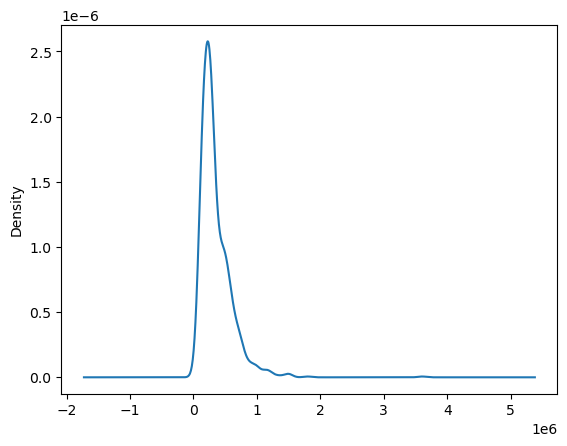

In [291]:
df_properties.sale_price.plot.kde();
plt.show()

Revisamos los máximos

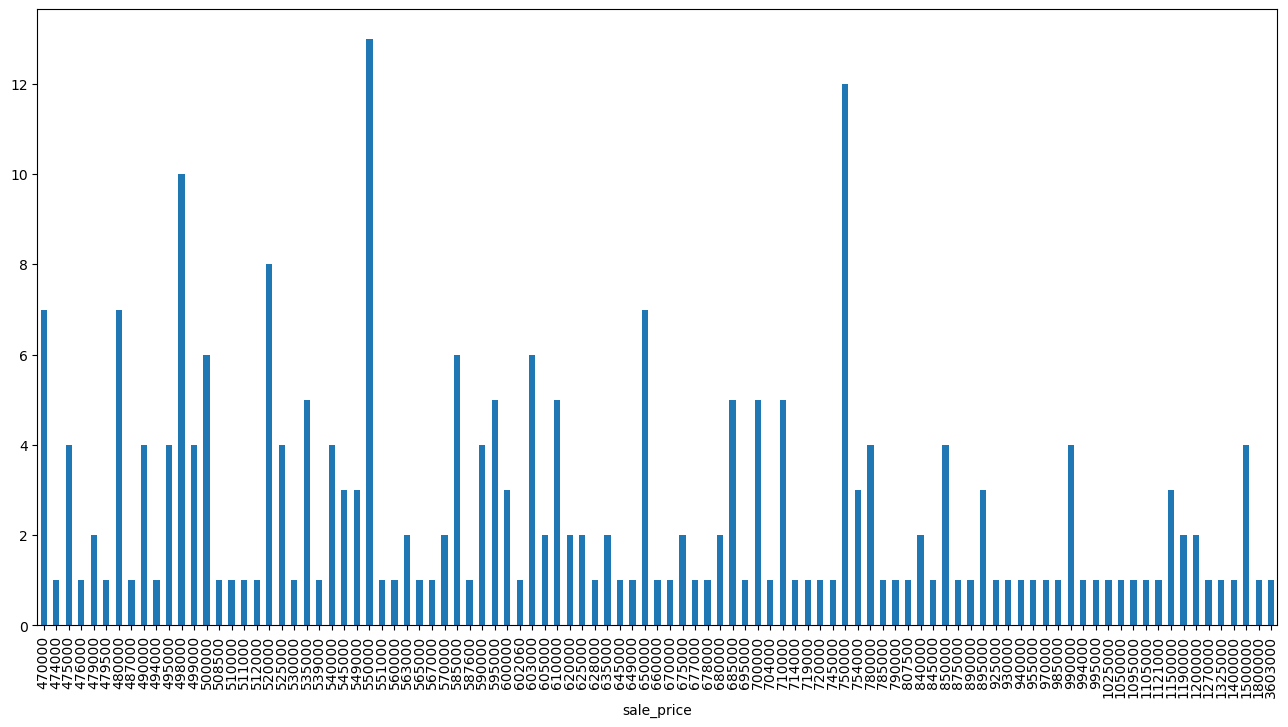

In [292]:
plt.figure(figsize=(16,8))
df_properties.sale_price.loc[df_properties.sale_price > 469500].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);
plt.show()

In [293]:
df_properties.loc[df_properties.sale_price > 1500000]['district'].unique()

array(['Ensanche', 'Ciudad Vieja - Centro'], dtype=object)

Conclusion:

* The high prices correspond to districts that have specific locations where they could fit. Prices above 1.5 million correspond to the areas of Ensanche and Ciudad Jardín, the most expensive in the city.

We check the minimum.

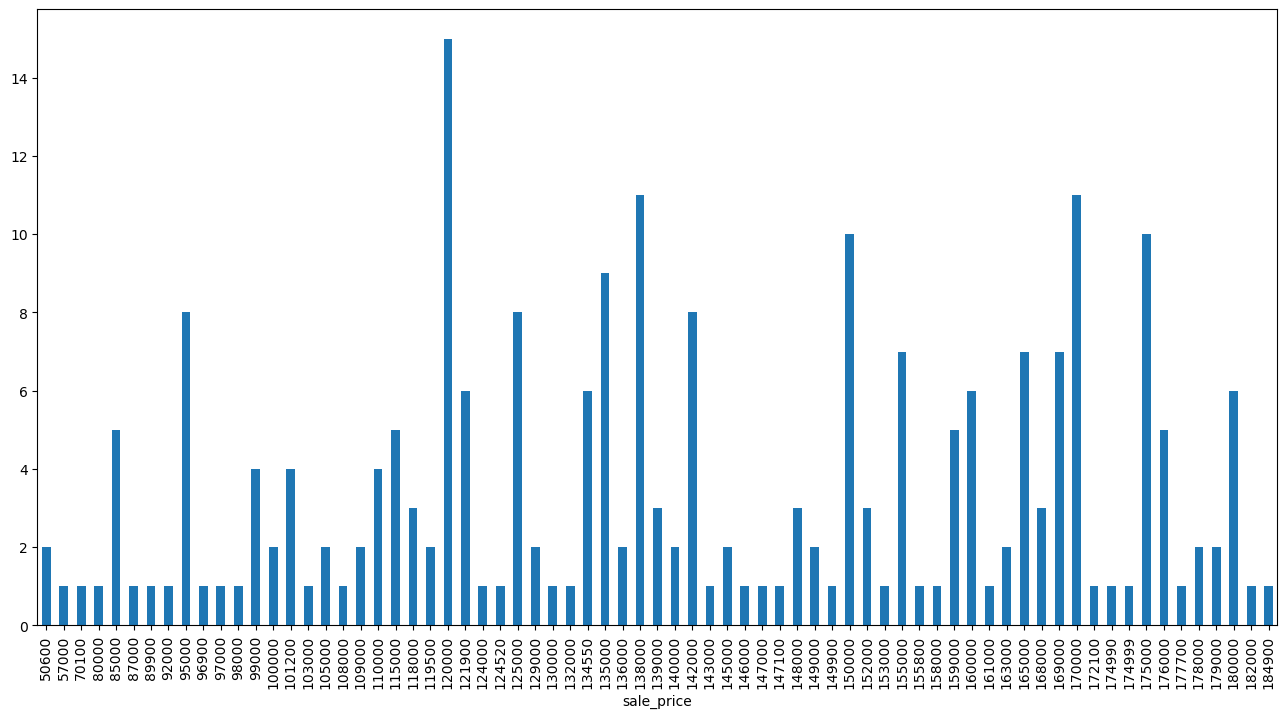

In [294]:
plt.figure(figsize=(16,8))
df_properties.sale_price.loc[df_properties.sale_price < 185000].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);
plt.show()

In [295]:
df_properties.loc[df_properties.sale_price < 80000]['district'].unique()

array(['Eirís', 'Monte Alto - Zalaeta - Atocha', 'Juan Flórez-San Pablo'],
      dtype=object)

In [296]:
df_properties.loc[(df_properties.sale_price < 80000) & (df_properties['district']=='Juan Flórez-San Pablo')]

,url,address,sale_price,parking,rooms,m2,district
1016,https://www.idealista.com/inmueble/102477442/,"Piso en avenida Finisterre, Juan Flórez-San Pa...",50600,NO,1,113,Juan Flórez-San Pablo
1030,https://www.idealista.com/inmueble/105504644/,"Piso en avenida Finisterre, Juan Flórez-San Pa...",50600,NO,1,113,Juan Flórez-San Pablo


Conclusion:

* The low prices correspond to districts with areas that fit within that range. Additionally, there are exceptions such as the records corresponding to Juan Flórez. These are properties with an abnormal ownership or legal situation. There is no way to automatically filter out these types of exceptions.

**Rooms**

We check the rooms maximum and minimum.

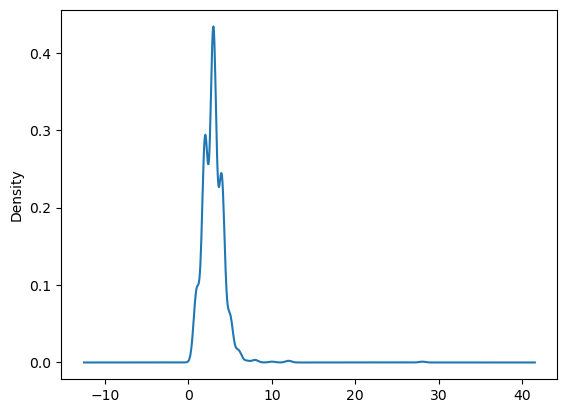

In [297]:
df_properties.rooms.plot.kde();
plt.show()

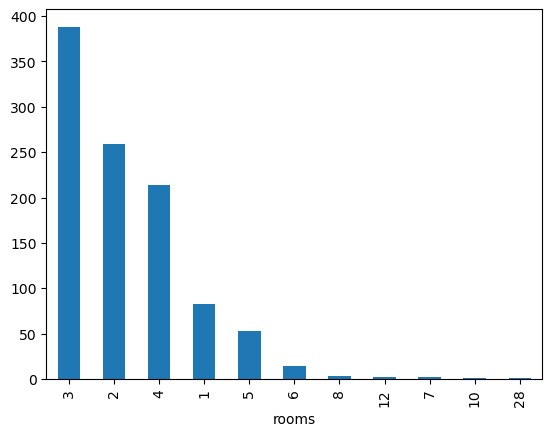

In [298]:
df_properties.rooms.value_counts(ascending=False).plot.bar();

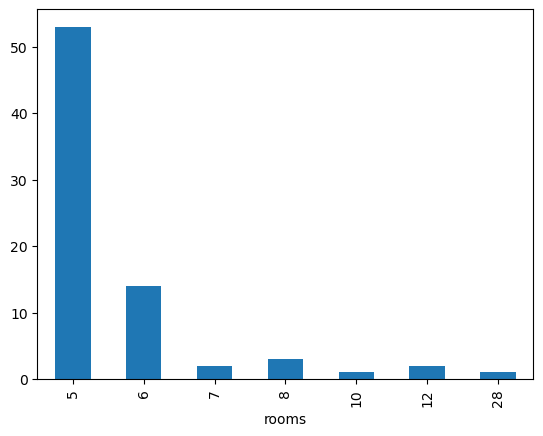

In [299]:
df_properties.rooms.loc[df_properties.rooms >= 5].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);
plt.show()

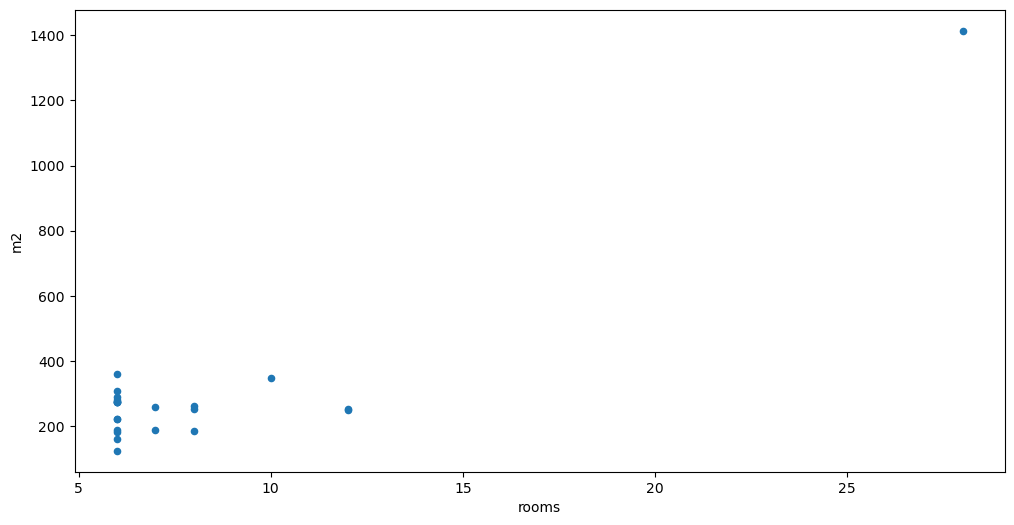

In [300]:
df_properties.loc[df_properties.rooms >5 ][['rooms','m2']].plot.scatter(x='rooms',y='m2',figsize=(12,6));

In [301]:
df_properties.loc[df_properties.rooms >5 ][['rooms','m2','district','url']].sort_values(by='rooms')

,rooms,m2,district,url
9,6,273,Ciudad Vieja - Centro,https://www.idealista.com/inmueble/105321892/
990,6,180,Monte Alto - Zalaeta - Atocha,https://www.idealista.com/inmueble/105744038/
941,6,220,Ensanche,https://www.idealista.com/inmueble/104810745/
912,6,124,Cuatro Caminos - Plaza de la Cubela,https://www.idealista.com/inmueble/97347150/
795,6,273,Ciudad Vieja - Centro,https://www.idealista.com/inmueble/105423452/
731,6,273,Ciudad Vieja - Centro,https://www.idealista.com/inmueble/104617374/
696,6,275,Agra del Orzán - Ventorrillo,https://www.idealista.com/inmueble/104373308/
490,6,290,Juan Flórez-San Pablo,https://www.idealista.com/inmueble/91576267/
1050,6,160,Falperra-Santa Lucía,https://www.idealista.com/inmueble/106279093/
436,6,280,Ensanche,https://www.idealista.com/inmueble/105875530/


Conclusion:

* The high number of rooms corresponds to apartments with many square meters, houses in the outskirts, or buildings. Initially, we do not pay too much attention to this because typically the most atypical cases correspond to purchase prices that exceed the investment limits of a middle-low class individual.

**m2**

We check the maximum.

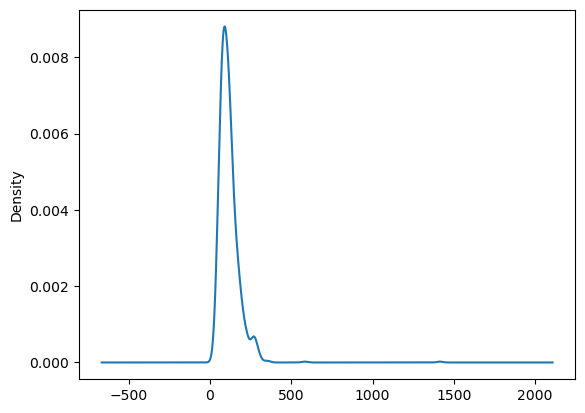

In [302]:
df_properties.m2.plot.kde();

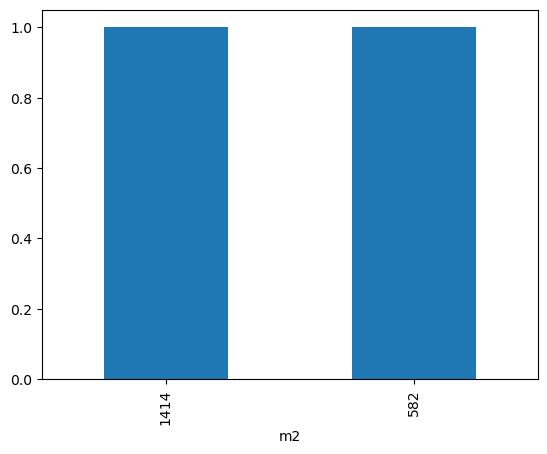

In [303]:
df_properties.loc[df_properties.m2 >500 ].m2.value_counts(ascending=False).plot.bar();

Conclusion:

* The high number of square meters aligns with the type of properties: spacious apartments in old areas of the city or houses. The atypical value of 1500 m2 corresponds to two contiguous buildings advertised together. Just like in the analysis of the number of rooms, these correspond to properties with a sale price that falls outside the investment range of a middle-low class individual.

## ANALYTIC DATAMART

We have 2 main tables:

* df_properties
* df_rental_sale

And we know that both share the district field, so we can merge them on that.

The main table is df_properties, as the detail table provides us with additional data.

Therefore, the table that should lead in the integration is df_properties.

The only hurdle is that the districts in the rental/sale table do not match those in the properties table. We need to build an intermediate dictionary and reassign values to a new temporary variable to perform the merge. We will subsequently delete this variable.

In [304]:
dicc_districts={'Someso - Matogrande':'Someso - Matogrande',
'Ensanche':'Centro - Juan Flórez - Plaza Pontevedra',
'Ciudad Vieja - Centro':'Ciudad Vieja',
'Riazor - Los Rosales':'Riazor - Los Rosales',
'Cuatro Caminos - Plaza de la Cubela':'Cuatro Caminos - Plaza de la Cubela',
'Elviña - a Zapateira':'Elviña - A Zapateira',
'Juan Flórez-San Pablo':'Centro - Juan Flórez - Plaza Pontevedra',
'Agra del Orzán - Ventorrillo':'Agra del Orzán - Ventorrillo - Vioño',
'Monte Alto - Zalaeta - Atocha':'Monte Alto - Zalaeta - Atocha',
'Sagrada Familia':'Sagrada Familia',
'Los Castros - Castrillón':'Los Castros - Castrillón - Eiris',
'Vioño':'Vioño',
'Eirís':'Los Castros - Castrillón - Eiris',
'Os Mallos':'Os Mallos',
'Falperra-Santa Lucía':'Centro - Juan Flórez - Plaza Pontevedra',
'Mesoiro':'Mesoiro',
'Ciudad Jardín':'Centro - Juan Flórez - Plaza Pontevedra',
'Paseo de los Puentes-Santa Margarita':'Centro - Juan Flórez - Plaza Pontevedra'
}

In [305]:
df_properties['district_merge']=df_properties.district.map(dicc_districts)

In [306]:
df_properties=df_properties.merge(right=df_rental_sale,how='left',left_on='district_merge',right_index=True)
df_properties

,url,address,sale_price,parking,rooms,m2,district,district_merge,m2_sale_price,m2_rental_price
0,https://www.idealista.com/inmueble/106370978/,"Piso en avenida Hércules, Monte Alto - Zalaeta...",285000,NO,2,100,Monte Alto - Zalaeta - Atocha,Monte Alto - Zalaeta - Atocha,3422,12
1,https://www.idealista.com/inmueble/97221042/,"Dúplex en calle José Pascual López-Cortón, Som...",480000,SI,4,200,Someso - Matogrande,Someso - Matogrande,2457,11
2,https://www.idealista.com/inmueble/105277913/,"Piso en calle Ramón de la Sagra, Ensanche, a C...",460000,NO,3,124,Ensanche,Centro - Juan Flórez - Plaza Pontevedra,3590,14
3,https://www.idealista.com/inmueble/105967967/,"Piso en calle Menéndez y Pelayo, Ensanche, a C...",550000,SI,5,160,Ensanche,Centro - Juan Flórez - Plaza Pontevedra,3590,14
4,https://www.idealista.com/inmueble/105859017/,"Piso en calle Ría do Burgo, Someso - Matogrand...",170000,NO,3,85,Someso - Matogrande,Someso - Matogrande,2457,11
...,...,...,...,...,...,...,...,...,...,...
1119,https://www.idealista.com/inmueble/104453354/,"Piso en calle Tornos, 29, Sagrada Familia, a C...",150000,NO,3,58,Sagrada Familia,Sagrada Familia,2207,12
1120,https://www.idealista.com/inmueble/81928768/,"Piso en calle Vila de Negreira, 30, Agra del O...",160000,NO,2,87,Agra del Orzán - Ventorrillo,Agra del Orzán - Ventorrillo - Vioño,2218,10
1122,https://www.idealista.com/inmueble/101388147/,"Piso en avenida Navarra, 5, Monte Alto - Zalae...",160000,NO,4,80,Monte Alto - Zalaeta - Atocha,Monte Alto - Zalaeta - Atocha,3422,12
1123,https://www.idealista.com/inmueble/36223126/,"Piso en avenida de Pedralonga, 57, Eirís, a Co...",179000,SI,2,70,Eirís,Los Castros - Castrillón - Eiris,2246,11


In [307]:
df_properties.drop(columns='district_merge',inplace=True)

## SAVE IN A PICKLE FILE

Now that we have the analysis table, we are going to save it in a pickle file so that whenever we want to perform analysis, we don’t have to repeat all the processing from this notebook.

In [308]:
data_file_name='df_properties_final.pickle'

In [309]:
path= '../../02_Data/02_Work/' + data_file_name

In [310]:
df_properties.to_pickle(path)